# Imports

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


# EDA

In [134]:
filepath = '/kaggle/input/playground-series-s4e6/train.csv'
df = pd.read_csv(filepath)
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [135]:
df.shape

(76518, 38)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [137]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


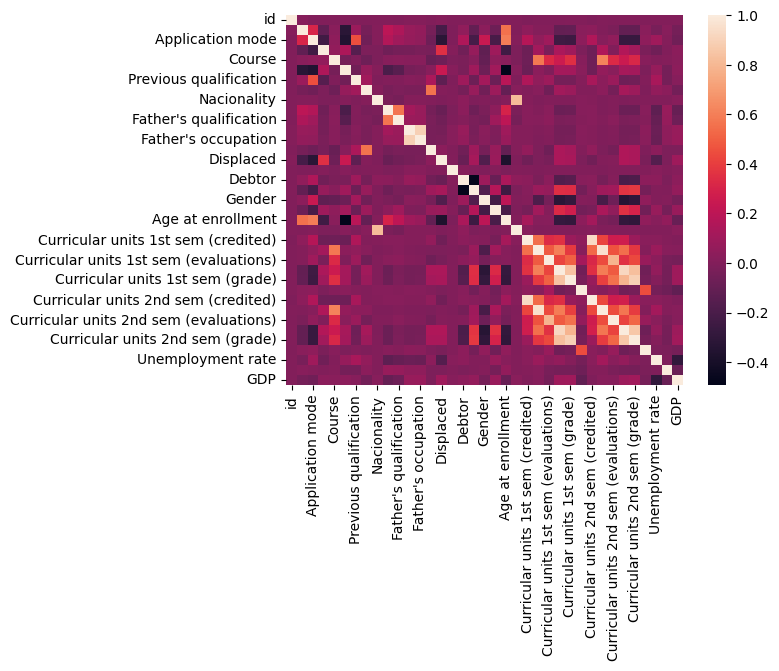

In [138]:
sns.heatmap(df.select_dtypes("number").corr());

# Train/Test Split

In [139]:
X, y = df.drop(columns=['Target']), df['Target'].map({"Enrolled": 0, "Graduate": 1, "Dropout": 2}).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Features: {X.shape}, Target: {y.shape}')

Features: (76518, 37), Target: (76518,)


# Initial Modeling

In [140]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 2, 0, ..., 1, 1, 1])

In [141]:
def evaluate(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification Report: {classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

In [142]:
evaluate(y_test, y_pred)

Accuracy: 0.8299137480397282
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.89      0.83      0.86      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1835  803  379]
 [ 454 6681  124]
 [ 529  314 4185]]


In [143]:
def map_to_classes(y_pred):
    pred_flat = pd.DataFrame({"Target": y_pred.flatten()})
    pred_flat["Target"] = pred_flat["Target"].replace({0: "Enrolled", 1: "Graduate", 2: "Dropout"})
    return pred_flat

In [144]:
results = map_to_classes(y_pred)
results

,Target
0,Graduate
1,Dropout
2,Enrolled
3,Dropout
4,Graduate
...,...
15299,Graduate
15300,Dropout
15301,Graduate
15302,Graduate


# Feature Selection

In [84]:
corr_matrix = df.corr()
target_corr = corr_matrix['Target'].abs().sort_values(ascending=False)
target_corr

Target                                            1.000000
Curricular units 2nd sem (grade)                  0.579027
Curricular units 1st sem (grade)                  0.527749
Curricular units 2nd sem (approved)               0.476784
Curricular units 1st sem (approved)               0.463164
Tuition fees up to date                           0.367774
Curricular units 2nd sem (evaluations)            0.358000
Curricular units 1st sem (evaluations)            0.292635
Age at enrollment                                 0.256851
Application mode                                  0.211198
Debtor                                            0.198563
Gender                                            0.180484
Course                                            0.139493
Scholarship holder                                0.136215
Curricular units 2nd sem (enrolled)               0.129250
Curricular units 1st sem (enrolled)               0.124453
Daytime/evening attendance                        0.1023

In [85]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

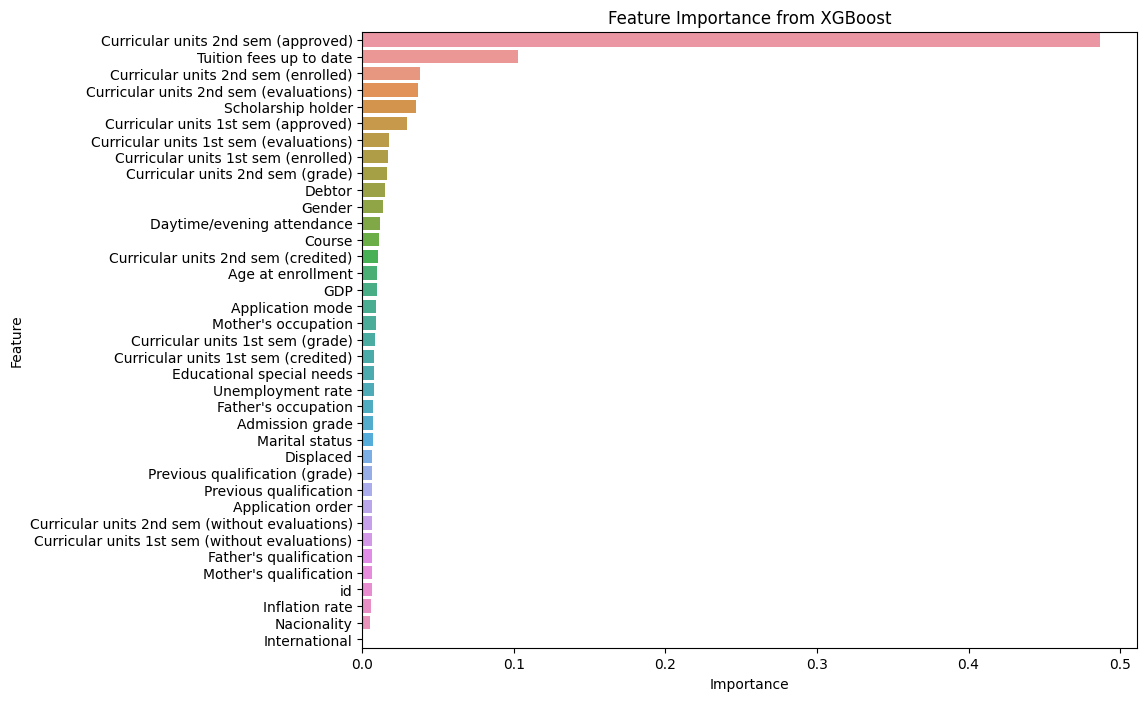

In [86]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from XGBoost')
plt.show()

In [111]:
# Select top N features (e.g., top 20)
top_features = feature_importance_df['Feature'].head(30).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [112]:
model.fit(X_train_top, y_train)
y_pred = model.predict(X_test_top)
evaluate(y_test, y_pred)

Accuracy: 0.832527443805541
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.90      0.84      0.87      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1842  810  365]
 [ 446 6699  114]
 [ 517  311 4200]]


### Feature selection doesn't seem to help much.

# Feature Engineering

In [114]:
# Feature Transformation
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
evaluate(y_test, y_pred)

Accuracy: 0.8299137480397282
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.89      0.83      0.86      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1835  803  379]
 [ 454 6681  124]
 [ 529  314 4185]]


In [119]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Optionally, you can keep track of the feature names
poly_feature_names = poly.get_feature_names_out(X_train.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

In [123]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', alpha=1)

In [124]:
model.fit(X_train_poly_df, y_train)
y_pred = model.predict(X_test_poly_df)
evaluate(y_test, y_pred)

Accuracy: 0.8315473078933612
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.89      0.84      0.86      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1838  795  384]
 [ 460 6680  119]
 [ 504  316 4208]]


# Grid Search

In [126]:
param_grid = {
    'n_estimators': [50, 25, 10, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [127]:
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_poly_df, y_train)
y_pred = model.predict(X_test_poly_df)
evaluate(y_test, y_pred)

Accuracy: 0.8315473078933612
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.89      0.84      0.86      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1838  795  384]
 [ 460 6680  119]
 [ 504  316 4208]]


In [145]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [146]:
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

Accuracy: 0.8299137480397282
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.61      0.63      3017
           1       0.86      0.92      0.89      7259
           2       0.89      0.83      0.86      5028

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304

Confusion Matrix: [[1835  803  379]
 [ 454 6681  124]
 [ 529  314 4185]]
